
![](Logo3.png)


# Modulo III   Series


## Tabla de Contenido

[3.1 Series](#id2)<br>
[3.2 Busquedas en Series](#id3)<br>
[3.3 Combinar Series](#id4)<br>
[3.4 Graficar Series](#id5)<br>


## Pandas 

- Es una **biblioteca de código abierto** para Python que agrega **estructuras de datos de alto rendimiento** y **herramientas para el análisis de grandes conjuntos de datos**. 
- Las **estructuras de datos de pandas** incluyen las **series** y las estructuras **dataframes (marco de datos)**. 
- **Los dataframes son la principal estructura de pandas**.
- Pandas es una **librería externa** y se tiene que instalar. (En el caso de Anaconda viene instalado).
- Se importa en un programa de Python mediante la instruccion import.
- Es convencional utilizar **import pandas as pd** para facilitar la escritura de las referencias a los componentes de pandas. 

![](Pandas_python.png)

## 3.1 Series  <a id='id2'> </a>

### Matriz unidimensional con etiquetas de eje.

- Las etiquetas no necesitan ser únicas, pero deben ser de tipo hashable. El objeto admite la **indexación basada en enteros y etiquetas** y proporciona una gran cantidad de **métodos para realizar operaciones relacionadas con el índice**.
- Las operaciones entre series (+, -, /, *, * *) alinean valores en función de sus valores de índice asociados; no es necesario que tengan la misma longitud. El índice de resultado será la unión ordenada de los dos índices.

![](series.png)


In [6]:
import pandas as pd

## Mostrar la documentacion de pandas
pd.Series?

In [3]:
# Creamos primero una lista y luego la convertimos a una serie
animales = ['Tigre', 'Oso', 'Leon', 'Leopardo']
pd.Series(animales)


0       Tigre
1         Oso
2        Leon
3    Leopardo
dtype: object

In [4]:
# Otra lista pero de numeros
numeros = [10, 20, 30, 40, 50]
pd.Series(numeros)


0    10
1    20
2    30
3    40
4    50
dtype: int64

In [5]:
# Información del medallero bajada desde
# https://es.wikipedia.org/wiki/Anexo:Medallero_de_los_Juegos_Ol%C3%ADmpicos_de_Tokio_2020 

# NOTA: Esta instrucción ya esta obsoleta y no funciona en las nuevas versiones de pandas

#  Leer un archivo csv
medallero = pd.Series.from_csv("MedallasOlimpiadas2020_10.csv")

C:\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [8]:
# Pandas usa las 2 primeras columnas como parte de la serie

medallero

Posicion                Pais
1             Estados Unidos
2                      China
3                      Japón
4                Reino Unido
5                      Rusia
6                  Australia
7           los Países Bajos
8                    Francia
9                   Alemania
10                    Italia
dtype: object

In [9]:
# Podemos especificar cual es la columna a usar como índice, pero 
# No podemos indicar cual es la columna a usar

# Checar referencia para ver las clausulas u opciones que se pueden usar
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.from_csv.html

medallero = pd.Series.from_csv("MedallasOlimpiadas2020_10.csv", index_col = 1 )
medallero


C:\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Pais                Posicion
Estados Unidos             1
China                      2
Japón                      3
Reino Unido                4
Rusia                      5
Australia                  6
los Países Bajos           7
Francia                    8
Alemania                   9
Italia                    10
dtype: object

In [11]:
medallero = pd.Series.from_csv("MedallasOlimpiadas2020_2cols.csv")
medallero

Estados Unidos      113
China                88
Japón                58
Reino Unido          65
Rusia                71
Australia            46
los Países Bajos     36
Francia              33
Alemania             37
Italia               40
dtype: int64

###  3.2 Búsquedas en Series   <a id='id3'> </a>

In [12]:
# Buscar por la posicion del indice

medallero.iloc[2]

58

In [13]:
# Tambien se puede hacer de esta forma
medallero[2]

58

In [38]:
# Buscar por la posición del indice usando slicing

medallero.iloc[2: 7]

Japón               58
Reino Unido         65
Rusia               71
Australia           46
los Países Bajos    36
dtype: int64

In [14]:
# # Buscar por el nombre del indice

medallero.loc["China"]

88

In [15]:
# si se pasa un parámetro entero, el operador se comportará como si desea que se consulte
# a través del atributo iloc. Si pasa un objeto, consultará como si quisiera usar el
# atributo loc basado en la etiqueta.

# LOS ATRIBUTOS ILOC Y LOC son utiles cuando por ejemplo el índice no es un entero
# y se quiere hacer referencia a una posicion dentro de la serie

medallero["China"]

88

In [16]:
# Iterar por los elementos de la serie para realizar calculos 

total = 0
for totalmedallas in medallero:
    total+=totalmedallas
print(total)

#  Esto funciona bien y da el resultado. Pero que pasaria si tuvieramos 
## 10 millones de elementos   ( seria muy tardado)


# la biblioteca NumPy  admite un método de cálculo llamado vectorización. 
# La vectorización funciona con la mayoría de las funciones de la biblioteca NumPy,
# incluida la función sum.

# Primero necesitamos importar el módulo numpy, y luego simplemente 
# llamamos a np.sum y pasamos un elemento iterabl

587


In [17]:
# Importamos a biblioteca numpy
import numpy as np

total = np.sum(medallero)
print(total)

587


## Comparativo de velocidad de procesamiento

- Jupyter Notebook tiene una función mágica que puede ayudar
- Las funciones mágicas comienzan con dos signos porcentuales 
- La función que vamos a usar se llama timeit. 
- **timeit** ejecutará el código unas cuantas veces para determinar, en promedio, cuánto tiempo toma.

In [18]:
# Para comparar los 2 metodos, crearemos una serie de de 100 mil numeros entre 1 y 100

s = pd.Series(np.random.randint(1,1000,100000))
s.head()

0    848
1    158
2    496
3      1
4     64
dtype: int32

In [19]:
# verificamos la longitud de la serie
len(s)

100000

In [ ]:
# Vamos a ejecutar timeit con nuestro código iterativo original. 
# Se especifica en timeit el número de veces que se va a ejecutar.

# esta función ejecutará nuestro código unas cuantas veces para determinar,
# en promedio, cuánto tiempo toma

In [26]:
%%timeit -n 100

summary = 0
for item in s:
    summary+=item

9.11 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%%timeit -n 100
summary = np.sum(s)

564 µs ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


###  3.3 Combinar Series   <a id='id4'> </a>

In [30]:
# Crear una serie desde cero

medallero2 = pd.Series({ 'Canada' : 24,
                      'Brasil': 21,
                      'Nueva Zelanda': 20,
                      'Cuba': 15,
                      'Hungría': 20})
medallero2



Canada           24
Brasil           21
Nueva Zelanda    20
Cuba             15
Hungría          20
dtype: int64

In [31]:
# Combinar el medallero que leimos desde el archivo csv y el que acabamos de crear
medallero_final = medallero.append(medallero2)
medallero_final

Estados Unidos      113
China                88
Japón                58
Reino Unido          65
Rusia                71
Australia            46
los Países Bajos     36
Francia              33
Alemania             37
Italia               40
Canada               24
Brasil               21
Nueva Zelanda        20
Cuba                 15
Hungría              20
dtype: int64

## 3.3 Graficar Series

Usaremos la libreria matplotlib

https://pandas.pydata.org/docs/user_guide/visualization.html#basic-plotting-plot

In [32]:
import matplotlib as plt
%matplotlib inline

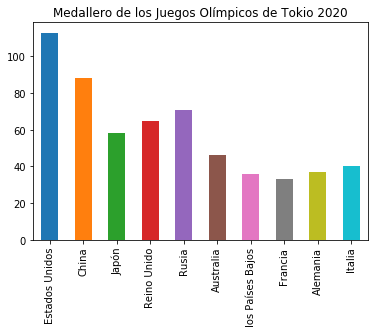

In [33]:
medallero.plot(kind='bar', title = 'Medallero de los Juegos Olímpicos de Tokio 2020')

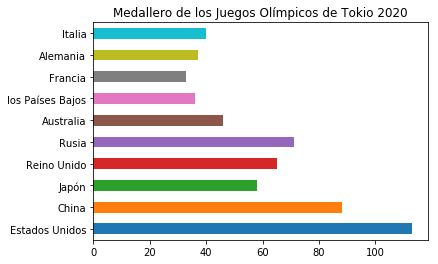

In [34]:
medallero.plot(kind='barh', title = 'Medallero de los Juegos Olímpicos de Tokio 2020')

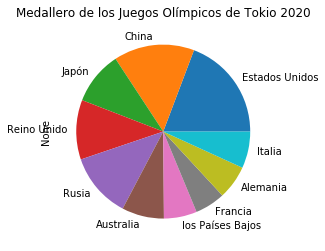

In [35]:
medallero.plot(kind='pie', title = 'Medallero de los Juegos Olímpicos de Tokio 2020')